In [ ]:
# !pip install seaborn

In [338]:
# Tutorial https://medium.com/deeplearningschool/2-1-linear-regression-f782ada81a53
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [339]:
url = "https://raw.githubusercontent.com/nikcheerla/deeplearningschool/master/examples/data/housing.csv"
data = pd.read_csv(url)

In [340]:
data.head()

,Unnamed: 0,Unnamed: 0.1,Square Feet (Millions),"Price ($, Millions)"
0,0,0,0.0118,0.2219
1,1,1,0.0257,0.5380
2,2,2,0.0077,0.1800
3,3,3,0.0196,0.6040
4,4,4,0.0168,0.5100


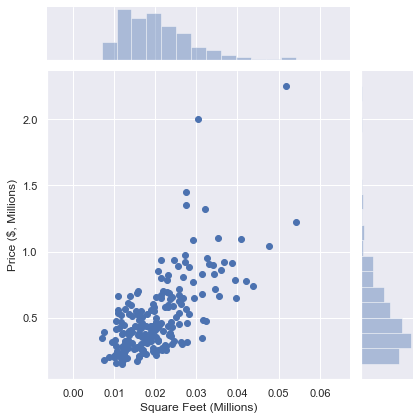

In [341]:
area = data["Square Feet (Millions)"]
price = data["Price ($, Millions)"]
sns.jointplot(area, price)
plt.show()

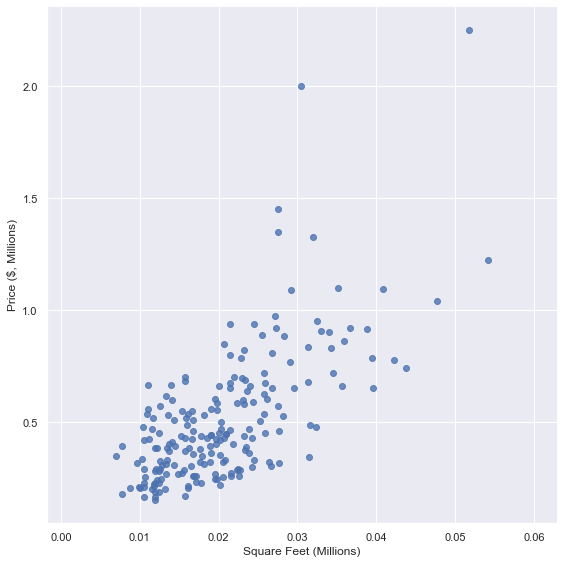

In [342]:
sns.lmplot(x="Square Feet (Millions)", y="Price ($, Millions)", data=data, height= 8, fit_reg = False)
plt.show()

In [343]:
# Prediction function
# Price of house equal to the area of the house * parameter 'm'

# Initial starting point
m = 1
def predict(m, input_areas):
    return m*input_areas

In [344]:
# MSE (Mean Squared Error) = measure how far away our predictions are from the actual values
# MSE = the mean of the squared differences between our predictions and the actual values.

# Compute MSE
def evaluate(m):
    price_predicted = predict(m, area)
    MSE = ((price - price_predicted)**2).mean()
    return MSE

print(evaluate(m=1))

0.325842497263995


In [345]:
# Learn function / stochastic gradient descent (SGD)

def learn(m):
    # Choose a random sample
    random_sample = random.randint(0, len(area) - 1)
    
    # Derivative calculation
    deriv = 2*(m*area[random_sample] - price[random_sample])*m
    
    # SGD update step
    m = m - 0.005*deriv  
    
    return m

In [364]:
# Training loop
print ("Initial value of M: ", m)
for i in range(0, 5000):
    m = learn(m)
    if i %100 == 0:
        print ("Loss: ", evaluate(m), "(M =", m, ")")

Initial value of M:  24.330396764064247
Loss:  0.04770717781590219 (M = 24.32730978082331 )
Loss:  0.047625455576199155 (M = 24.81890127658852 )
Loss:  0.04762250187833646 (M = 24.738942112571287 )
Loss:  0.04781897480846206 (M = 25.37241462977713 )
Loss:  0.0479130216799537 (M = 25.508694813829084 )
Loss:  0.04773342730135064 (M = 25.215565207217402 )
Loss:  0.047633075604654546 (M = 24.88788667344639 )
Loss:  0.047663967049605425 (M = 25.031351972479804 )
Loss:  0.047623346073809095 (M = 24.782937265684705 )
Loss:  0.04770290276166987 (M = 25.145104249655034 )
Loss:  0.04762427444583677 (M = 24.801483060131304 )
Loss:  0.04774534308708249 (M = 25.24037742720235 )
Loss:  0.0476516338950039 (M = 24.498548732031477 )
Loss:  0.04765493376758124 (M = 24.997845581835517 )
Loss:  0.04762924920722778 (M = 24.624556726686652 )
Loss:  0.04776348877802951 (M = 25.27595398506886 )
Loss:  0.04777346320250652 (M = 25.294535988411386 )
Loss:  0.04804267495892396 (M = 25.66413713097172 )
Loss:  0.04

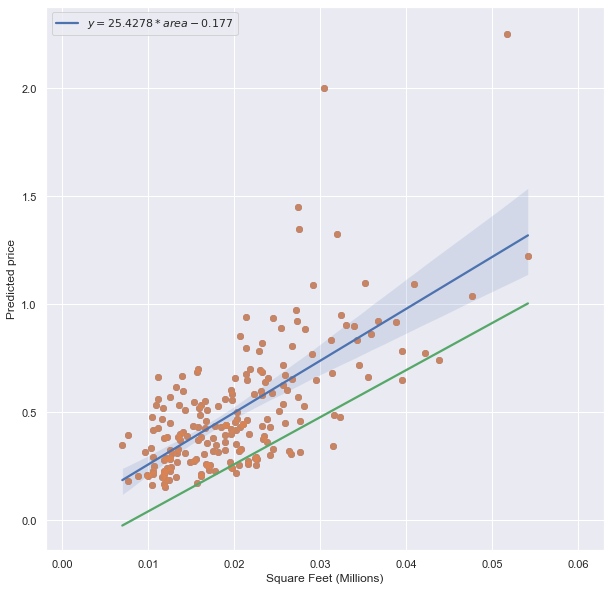

In [365]:
intercept = 0.177
fig, ax = plt.subplots()
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(10, 10)})
ax = sns.regplot(x=area, y=price, line_kws={'label':'$y=%3.7s*area-%3.7s$'%(m, intercept)});
ax.legend()
sns.regplot(x=area, y=price, fit_reg=False, ax=ax)
sns.regplot(x=area, y=predict_price,scatter=False, ax=ax)

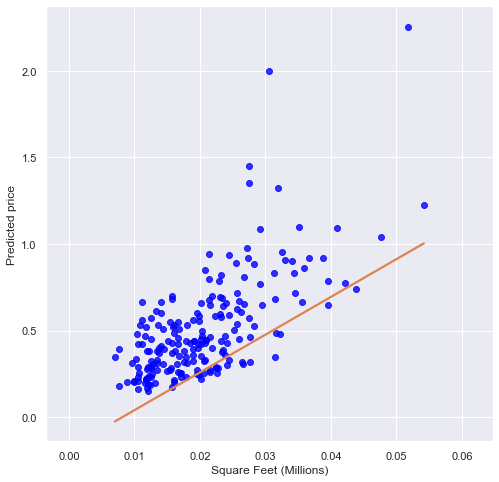

In [370]:
#print(predict_price.name)
predict_price = predict_price.rename('Predicted price')
#ax = sns.regplot(x=area, y=price, line_kws={'label':'$predict_price=%3.7s*area-%3.7s$'%(m, intercept)})
#ax.legend()
fig, ax = plt.subplots()
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(8, 8)})
sns.regplot(x=area, y=price, fit_reg=False, ax=ax,scatter_kws={"color": "blue"})
sns.regplot(x=area, y=predict_price,scatter=False, ax=ax, scatter_kws={"color": "pink"})